In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from simulation_statistics.analysis_functions_definitions import *

In [2]:
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 5})
mlib.rcParams.update({'figure.autolayout': True})

In [6]:
# RANDOM DELAY
fname= "results_for_testing_random_delay_drifting_grating_6k_sigma_5_5_no_jiggling_1xrt"

# CONSTANT DELAY

cached_data = np.load("C:\Work\phd\simulation_statistics\\" + fname + ".npz")
testing_data = np.load("C:\Work\phd\synaptogenesis\spiking_moving_bar_input\spiking_moving_bar_motif_bank_simtime_1200s.npz")

In [7]:
rate_means = cached_data['rate_means']
rate_stds = cached_data['rate_stds']
rate_sem = cached_data['rate_sem']
all_rates = cached_data['all_rates']
radians = cached_data['radians']
instaneous_rates = cached_data['instaneous_rates']
angles = cached_data['angles']
actual_angles = cached_data['actual_angles']
target_neuron_mean_spike_rate = cached_data[
    'target_neuron_mean_spike_rate']


# Connection information
ff_connections = cached_data['ff_connections']
lat_connections = cached_data['lat_connections']
noise_connections = cached_data['noise_connections']
ff_off_connections = cached_data['ff_off_connections']

final_ff_conn_field= cached_data['final_ff_conn_field']
final_ff_num_field= cached_data['final_ff_num_field']
final_lat_conn_field= cached_data['final_lat_conn_field']
final_lat_num_field= cached_data['final_lat_num_field']

ff_last = cached_data['ff_last']
off_last = cached_data['off_last']
noise_last = cached_data['noise_last']
lat_last = cached_data['lat_last']

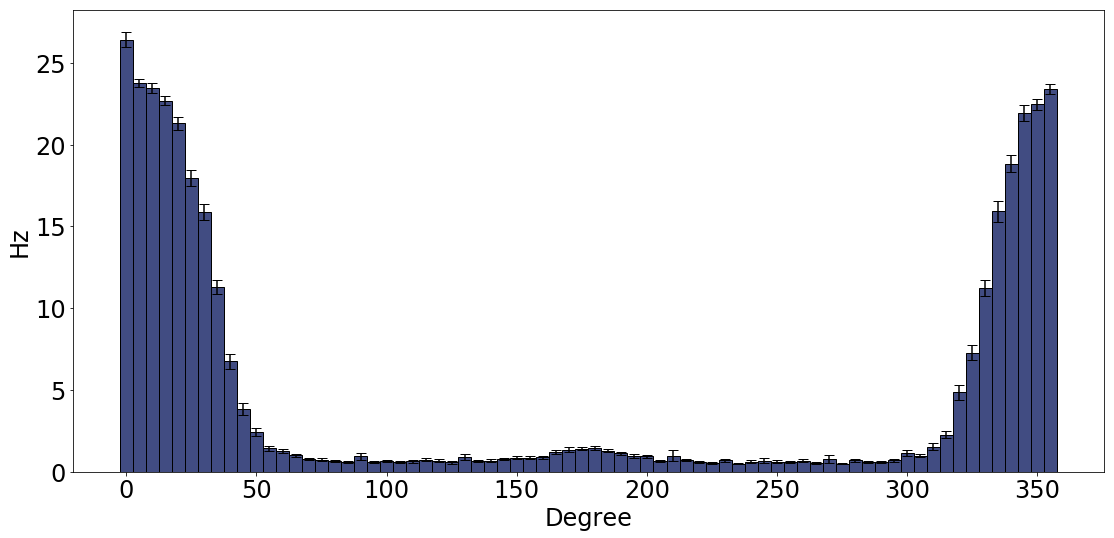

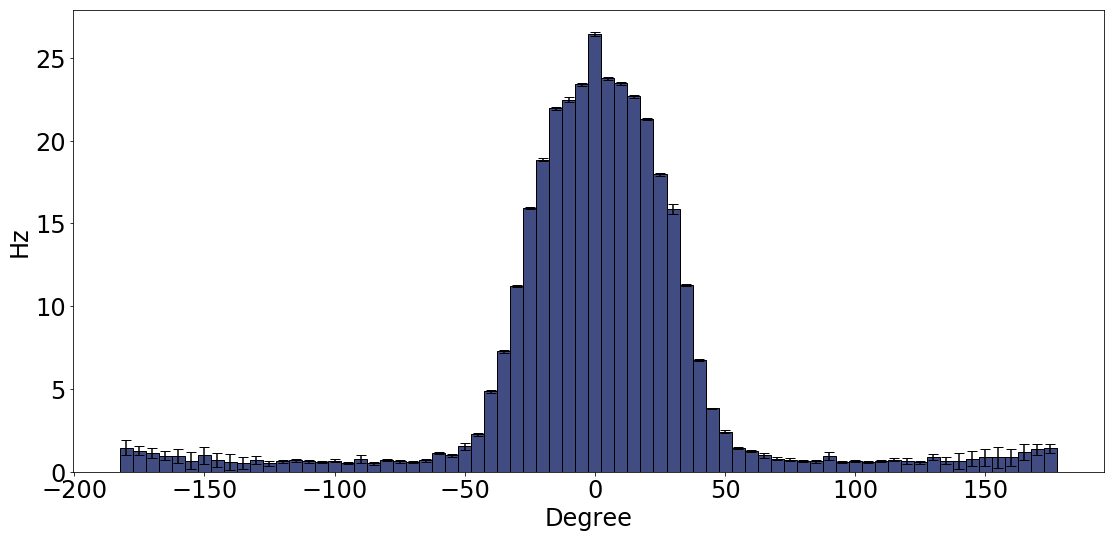

In [9]:
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(angles, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles, rate_means, width=width, yerr=rate_sem,
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Hz")
plt.savefig("firing_rate_with_angle_hist.png")
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(angles, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles-180, np.roll(rate_means,180//5), width=width, yerr=rate_sem,
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Hz")
plt.savefig("firing_rate_with_angle_hist_centred.png")
plt.show()

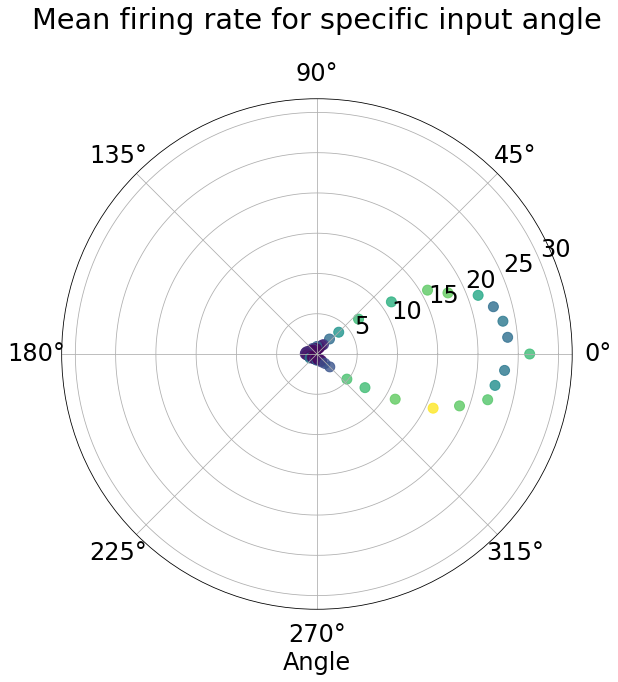

In [10]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
c = plt.scatter(radians, rate_means, c=rate_sem,
                s=100)
c.set_alpha(0.8)
plt.ylim([0, 1.2 * np.max(rate_means)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle.png")
plt.show()

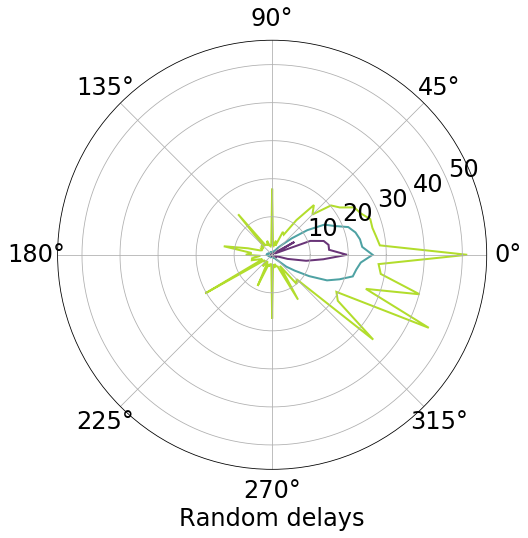

In [12]:
f, ax = plt.subplots(1, 1, figsize=(15, 8), subplot_kw=dict(projection='polar'), dpi=800)

# '#440357'  '#228b8d', '#b2dd2c'

maximus = np.max((rate_means))
minimus = 0

c = ax.fill(radians, rate_means, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
mins = [np.min(r) for r in all_rates]
ax.fill(radians, mins, fill=False, edgecolor='#440357', lw=2,
        alpha=.8, label="Min response")
maxs = [np.max(r) for r in all_rates]
ax.fill(radians, maxs, fill=False, edgecolor='#b2dd2c', lw=2,
        alpha=1, label="Max response")
maximus = np.max(maxs)
ax.set_ylim([minimus, 1.1 * maximus])
ax.set_xlabel("Random delays")
plt.savefig("rate_means_min_max_mean.png", bbox_inches='tight')
plt.show()

('mean', 4.6688338216145837)
('skew', 5.637866408852028)
('kurtosis', 31.105064775219418)
('normality', NormaltestResult(statistic=87.354478647598469, pvalue=1.0745236456934218e-19))


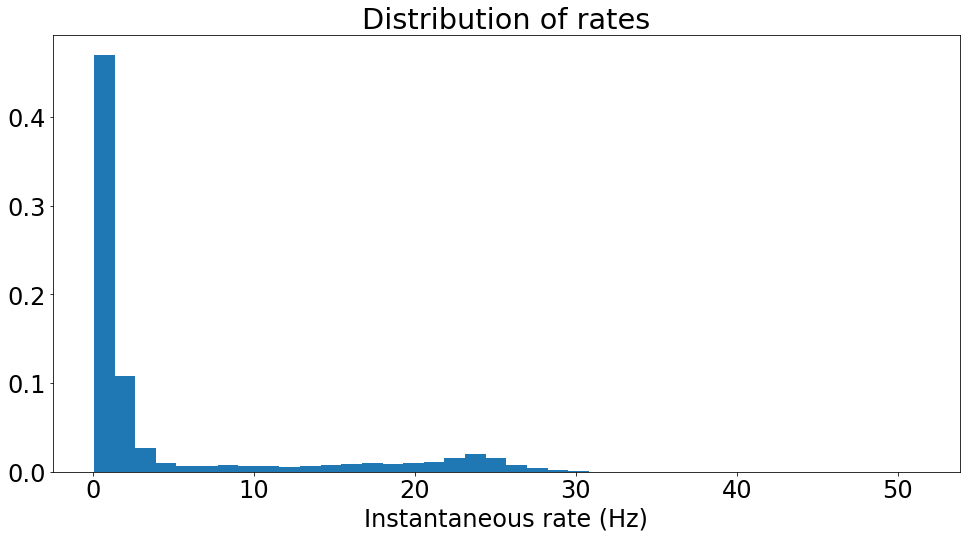

In [13]:
plt.figure(figsize=(14, 8), dpi=600)
n, bins, patches = plt.hist(instaneous_rates, bins=40, normed=True)
print("mean", np.mean(instaneous_rates))
print("skew", stats.skew(n))
print("kurtosis", stats.kurtosis(n))
print("normality", stats.normaltest(n))
plt.title("Distribution of rates")
plt.xlabel("Instantaneous rate (Hz)")
plt.show()

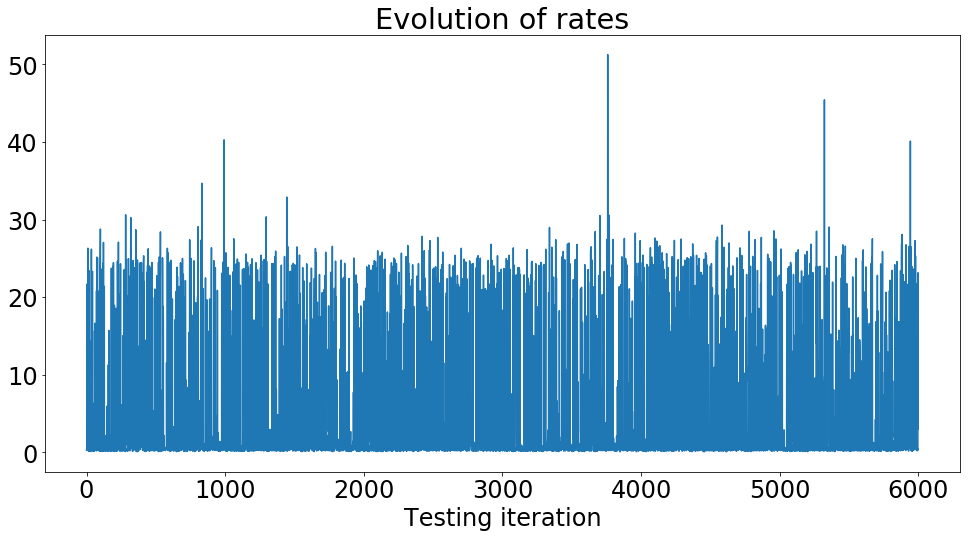

In [14]:
plt.figure(figsize=(14, 8), dpi=600)
plt.plot(instaneous_rates)
plt.title("Evolution of rates")
plt.xlabel("Testing iteration")
plt.show()

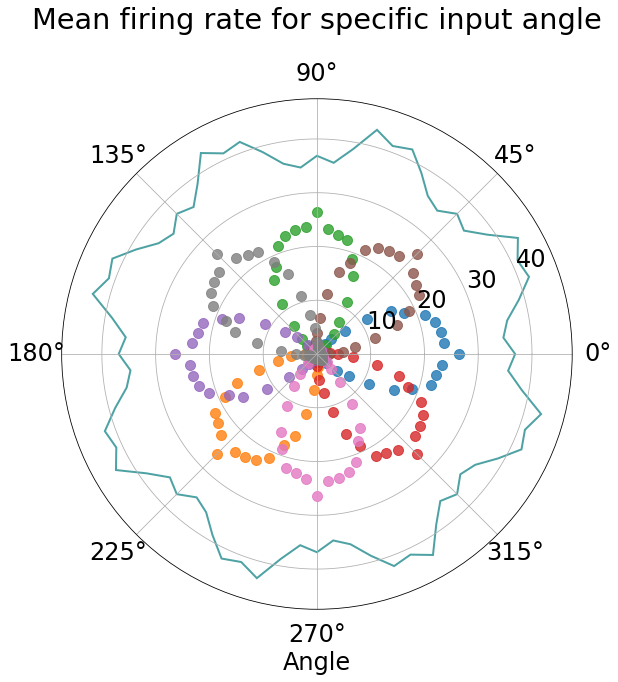

In [23]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
no_stacks = 8
stacked_angles = np.zeros((no_stacks, angles.size))
for i in range(no_stacks):
    stacked_angles[i] = np.roll(rate_means, i*(360//no_stacks))
    c = plt.scatter(radians, stacked_angles[i], s=100)
    c.set_alpha(0.8)
    
sum_of_responses = np.sum(stacked_angles, axis=0)
ax.fill(radians, sum_of_responses, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
plt.ylim([0, 1.1 * np.max(sum_of_responses)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle_stacked.png")
plt.show()